## Observations and Insights 

Key inferences after data exploration:

1. Sample size appeared uniform across all drug regiment.

2. Gender distrubution was even across all drug regimen.

3. Capomulin and Ramicane appeared to be most effective drug againt tumor growth. Both of them have potential to be used for next stage of drug approval process. 

4. In the mouse selected for line plot (Mouse ID = m601), capomulin apperead very effective in reducing tumor volume with time. 

5. There is strong correlation between mouse weight and tumour volume for capomulin regimen (correlation cofficient = 0.84). This makes sense because, bigger a mouse is, it likely that the size of the tumor will be bigger based on its body size. This is further supprted by the equation of line of best fit for the relationship between weight and tumour volume, y = 0.95x + 21.55. Based on the equation, it appears that with increase of every gram of weight of mice, the tumor volume also increase by 1mm3 (0.95mm3 to be exact).



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")
# Display the data table for preview
merged_df.sample(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
525,a577,Infubinol,Female,6,25,5,46.197720,1
1644,v835,Naftisol,Male,7,29,15,50.545206,1
691,c580,Ketapril,Male,22,25,5,46.628455,0
1312,o809,Infubinol,Male,3,25,35,55.629428,1
1666,w151,Ceftamin,Male,24,25,25,51.869059,2
441,r921,Ramicane,Female,5,25,0,45.000000,0
591,b313,Zoniferol,Male,12,27,15,49.188387,1
44,g791,Ramicane,Male,11,16,20,41.211897,0
1384,p981,Stelasyn,Male,20,29,20,50.358069,0
801,e584,Naftisol,Male,9,27,0,45.000000,0


In [2]:
#checking data for duplicated values
merged_df["Mouse ID"].value_counts()
#g989 mouse id has more than 10 entries. Check for duplicates

g989    13
t198    10
e584    10
y260    10
i738    10
        ..
d133     1
h428     1
u153     1
t573     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Checking the number of mice.
number_mice = merged_df["Mouse ID"]
len(number_mice)

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged_df[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_df[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = "first")
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#verify duplicates are removed
clean_df[clean_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"])

1888

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group mice by Drug regimen and tumor volume
tumor_summary = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]


In [10]:
#calculate mean
tumor_mean = tumor_summary.mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#calculate median
tumor_median = tumor_summary.median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#calculate Standard deviation
tumor_std = tumor_summary.std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Calculate SEM
tumor_sem = tumor_summary.sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Calculate variance 
tumor_var = tumor_summary.var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

overall_tumor_summary = pd.DataFrame(
{"Mean Tumor Size": tumor_mean,
 "Median Tumor Size": tumor_median,
 "Variance of Tumor Size": tumor_var,
 "Std Dev of Tumor Size": tumor_std,
 "SEM of Tumor Size": tumor_sem                               
})

overall_tumor_summary.reset_index()

,Drug Regimen,Mean Tumor Size,Median Tumor Size,Variance of Tumor Size,Std Dev of Tumor Size,SEM of Tumor Size
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice')

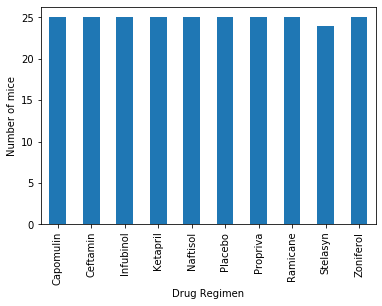

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#get unique mouse count for each drug regiment
mice_count = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mice_count = pd.DataFrame({"Mice Count": mice_count}).reset_index()
mice_count
barplot = mice_count.plot("Drug Regimen", "Mice Count", kind ="bar", legend = False ) 
#https://stackoverflow.com/questions/40315878/a-convenient-way-to-plot-bar-plot-in-python-pandas
barplot.set_xlabel("Drug Regimen")
barplot.set_ylabel("Number of mice")

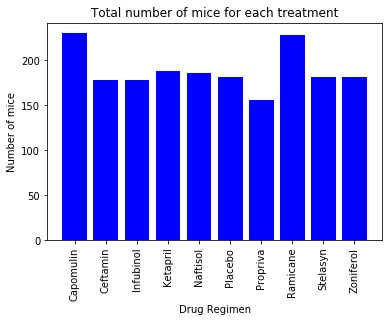

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
tumor_summary = clean_df.groupby("Drug Regimen")
tumor_summary_data = tumor_summary["Tumor Volume (mm3)"].describe()
tumor_summary_data = pd.DataFrame(tumor_summary_data).reset_index()
plt.bar(tumor_summary_data["Drug Regimen"], tumor_summary_data["count"], color = "b", align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Total number of mice for each treatment")
plt.show()

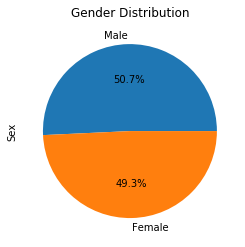

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieplot = clean_df["Sex"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", legend = False, title = "Gender Distribution")
#https://stackoverflow.com/questions/38337918/plot-pie-chart-and-table-of-pandas-dataframe


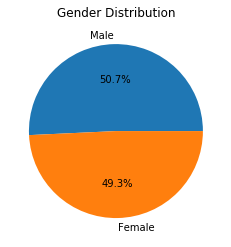

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df["Sex"].value_counts(), labels = ["Male", "Female"], autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = max_tumor.merge(clean_df, on = ['Mouse ID', 'Timepoint'], how = 'left')


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quantiles = final_tumor_vol.quantile([.25, .5, 0.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    IQR = upperq - lowerq
    lowerbound = lowerq - (1.5 * IQR)
    upperbound = upperq + (1.5 * IQR)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lowerbound)| (final_tumor_vol > upperbound)]
    print(f"{drug}: {outliers}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


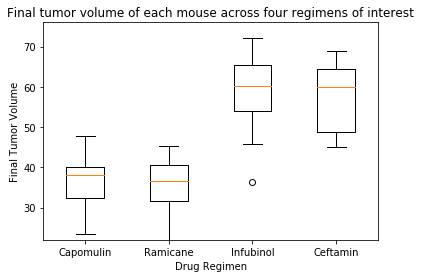

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume")
plt.title("Final tumor volume of each mouse across four regimens of interest")
plt.ylim(22,76)
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [25]:
#choosing a mouse treated with capomulin
m601 = capomulin.loc[capomulin["Mouse ID"] == 'm601', :]
m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


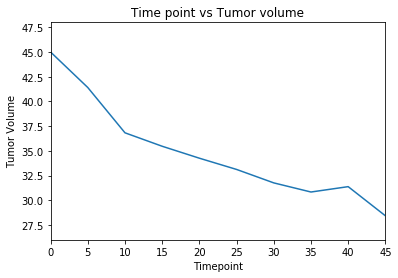

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(m601["Timepoint"], m601["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Time point vs Tumor volume")
plt.xlim(0,45)
plt.ylim(26,48)
plt.show()

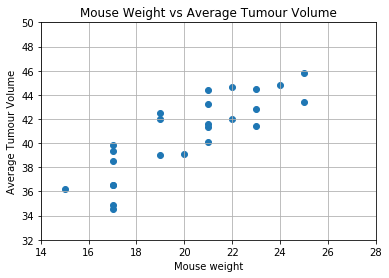

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#group by mouse ID and get mean and use it to scatterplot
scatter_data = capomulin.groupby("Mouse ID").mean()

scatter_data = pd.DataFrame(scatter_data).reset_index()

plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumour Volume")
plt.title("Mouse Weight vs Average Tumour Volume")
plt.xlim(14,28)
plt.ylim(32,50)
plt.grid()
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
round(st.pearsonr(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])[0], 2)



0.84

In [29]:
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]

In [30]:

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print("slope", slope)
print("intercept", intercept)
print(x_values * slope + intercept)

slope 0.9544396890241045
intercept 21.552160532685015
0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64


In [31]:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


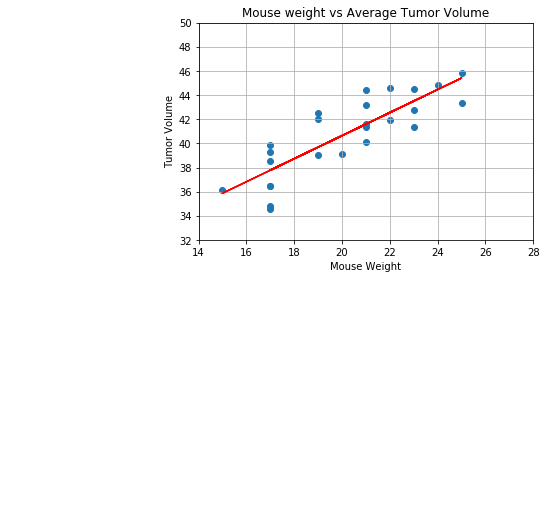

In [32]:
# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlim(14,28)
plt.ylim(32,50)
plt.grid()
plt.show()

The r-squared is: 0.7088568047708717


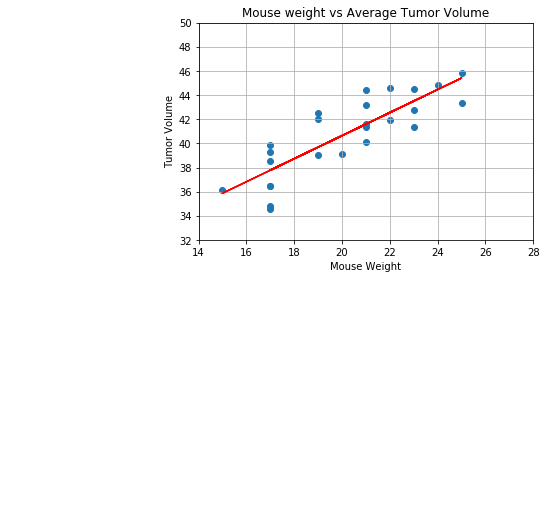

In [33]:
# Print out the r-squared value along with the plot.
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlim(14,28)
plt.ylim(32,50)
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.show()